In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
sns.set_theme(style='darkgrid')

In [33]:
df = pd.read_csv('../data/processed/tøjfirma_sales_data.csv')
df

,Product,Category,Size,Units Sold,Sale Price,Sale Date
0,Shorts,Children,XL,1,27.03,2023-01-01 00:00:00
1,Jeans,Children,XS,4,56.77,2023-01-01 00:01:00
2,Skirt,Men,XL,3,38.72,2023-01-01 00:02:00
3,Jacket,Women,S,1,77.47,2023-01-01 00:03:00
4,Shorts,Children,L,3,32.21,2023-01-01 00:04:00
...,...,...,...,...,...,...
49995,Dress,Children,XS,1,56.65,2023-02-04 17:15:00
49996,T-Shirt,Women,S,2,22.63,2023-02-04 17:16:00
49997,Socks,Men,L,4,10.20,2023-02-04 17:17:00
49998,Sweater,Men,L,3,44.02,2023-02-04 17:18:00


In [34]:
df['Product'] = df['Product'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Size'] = df['Size'].astype('category')
df['Units Sold'] = df['Units Sold'].astype('int')
df['Sale Price'] = df['Sale Price'].astype('float')
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [35]:
average_sale = round(df['Sale Price'].mean())
total_sales = round(df['Sale Price'].sum())

print(f'Average sale: {average_sale:>10} DKK')
print(f'Total sales:  {total_sales:>10} DKK')

Average sale:         41 DKK
Total sales:     2051215 DKK


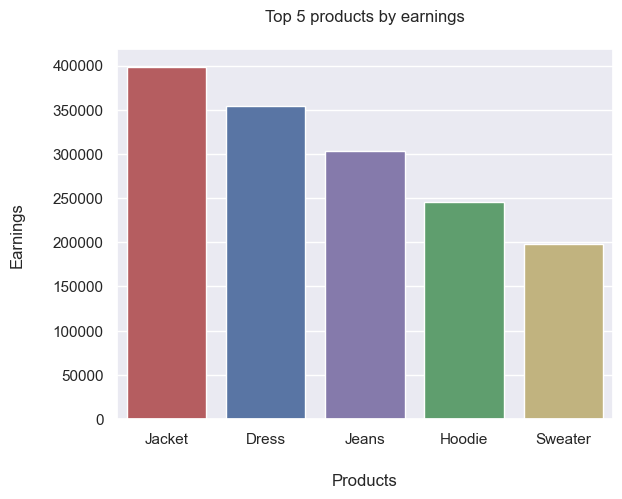

In [36]:
products = (
    df.groupby('Product', observed=True)['Sale Price'].sum().nlargest(5).reset_index()
)

product_earnings_plot = sns.barplot(
    x='Product',
    y='Sale Price',
    data=products,
    order=products['Product'],
    hue='Product',
    dodge=False,
)

product_earnings_plot.set_title('Top 5 products by earnings', pad=20)
product_earnings_plot.set_xlabel('Products', labelpad=20)
product_earnings_plot.set_ylabel('Earnings', labelpad=20);